                Age      HighChol     CholCheck           BMI        Smoker  \
count  70692.000000  70692.000000  70692.000000  70692.000000  70692.000000   
mean       8.584055      0.525703      0.975259     29.856985      0.475273   
std        2.852153      0.499342      0.155336      7.113954      0.499392   
min        1.000000      0.000000      0.000000     12.000000      0.000000   
25%        7.000000      0.000000      1.000000     25.000000      0.000000   
50%        9.000000      1.000000      1.000000     29.000000      0.000000   
75%       11.000000      1.000000      1.000000     33.000000      1.000000   
max       13.000000      1.000000      1.000000     98.000000      1.000000   

       HeartDiseaseorAttack  PhysActivity        Fruits       Veggies  \
count          70692.000000  70692.000000  70692.000000  70692.000000   
mean               0.147810      0.703036      0.611795      0.788774   
std                0.354914      0.456924      0.487345      0.408181

<Axes: >

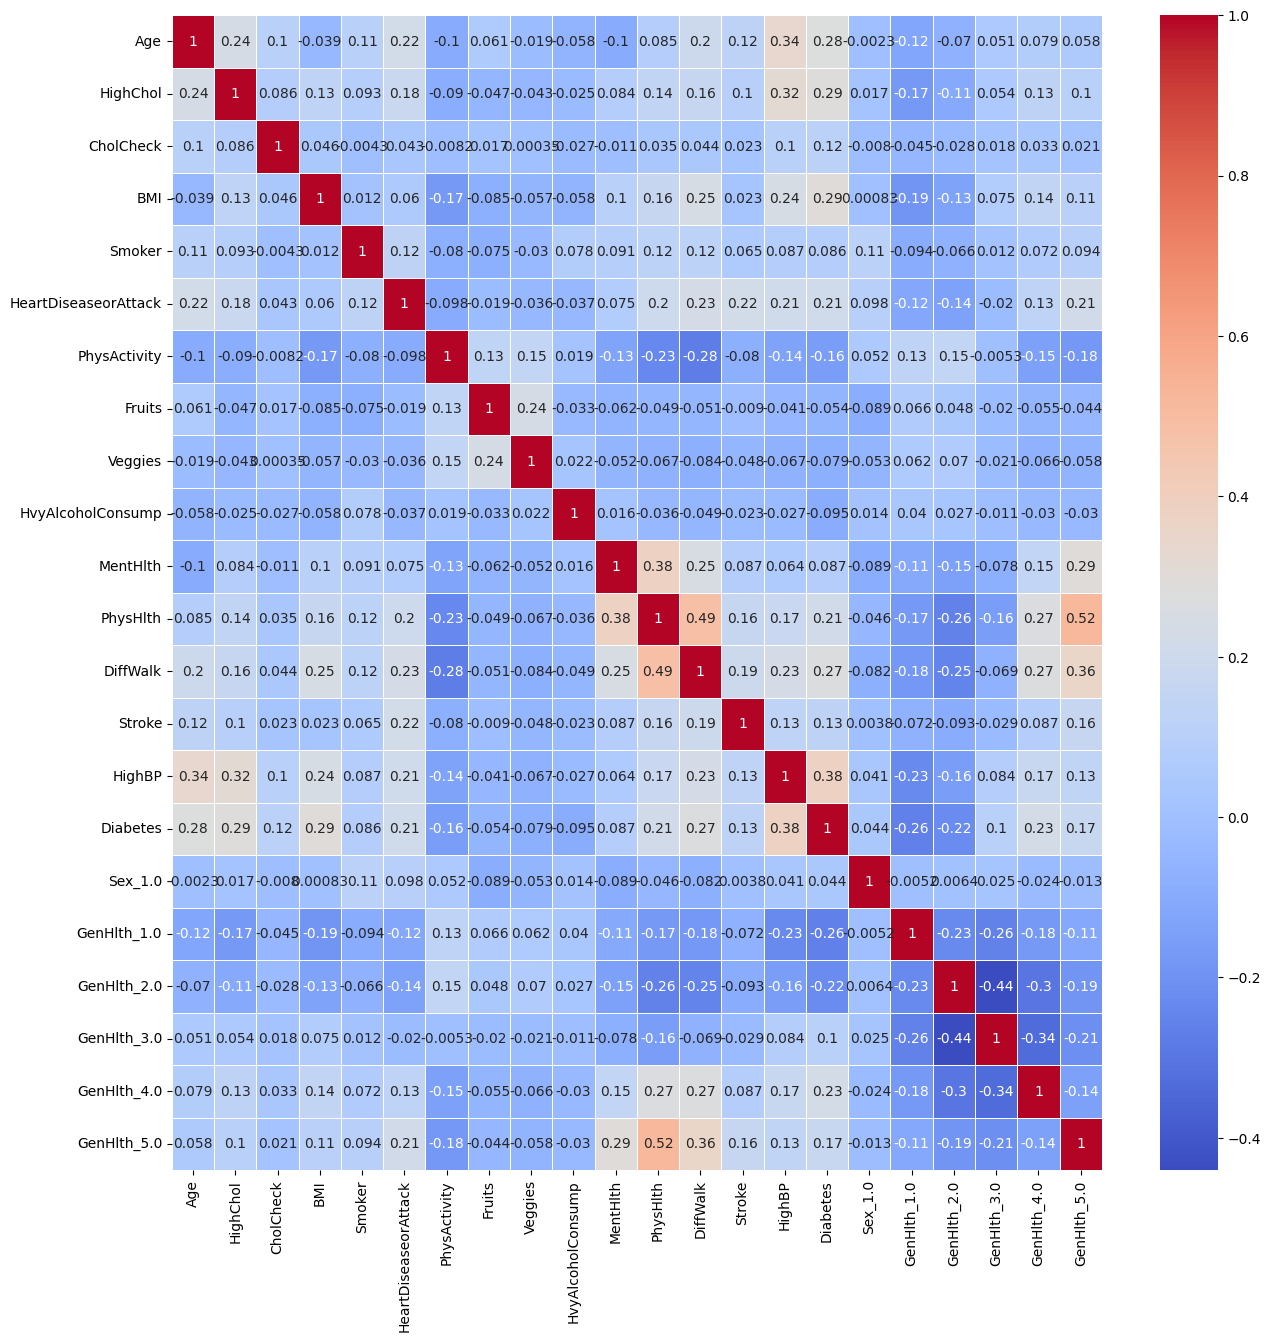

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Read the data into a pandas dataframe
df = pd.read_csv("diabetes_data.csv")

# One hot encoding, dropfirst to remove the redundant column, since for sex they will have perfect negative corrolation (e.g. is_female and is_male)
df = pd.get_dummies(df, columns=["Sex"], drop_first=True) 
# One hot encoding for GeneralHealth since its a catagorical value from 1-5
df = pd.get_dummies(df, columns=["GenHlth"]) 

# Check if we have cyclical values | We dont :) often in form of months, days or any time series.

# Check scaling and what columns its need to do scaling (essentially if range is above 0<x<1 => we need to scale) 
print(df.describe())
# Init of scaler
scaler = StandardScaler()
# Apply scaling for BMI, Mental health, Physical Health, and maybee age ??? 
df["BMI", "MentHlth", "PhysHlth", "Age"] = scaler.fit_transform(df["BMI", "MentHlth", "PhysHlth", "Age"])

# Splitting the data into data and target
data = df.drop("Diabetes", axis=1)
target = df["Diabetes"]

# Make a train and test split
# Train 80%
# Test 20%
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

# Check features that are correlated
plt.figure(figsize=(15, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)


# Pycaret for choosing the best models, pick top 5 and then tune their hyperparameters. 



# hyperparameter-tuning: random? bayesian optimisation? grid-search takes a lot of time but is precise
    # Optuna
    # Hyper-opt
